# Your Name Here

# Instructions

* Change "Your Name Here" to your name.
* Fill in the empty chunks with your code. 
* Do not add any code chunks in your final submission besides the ones already here. 
* Use **no** additional modules other than:
    - `numpy`
    - `matplotlib`
    - `statsmodels`

In [1]:
# import modules here
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
%matplotlib inline

# Question 1

Consider 

$$
y = f(x) = -5x^2 + 5x
$$

## Question 1.1

Create an array `x` from -100 to 100 in steps of 0.01, then create `y` based on the $f(x)$, then plot it with labels. 

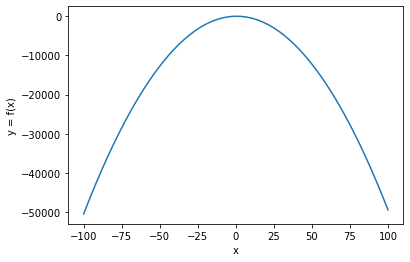

In [2]:
x = np.arange(-100, 100, 0.01)
y = -5*x**2 + 5*x
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y = f(x)")
plt.show()

## Question 1.2 

Solve for $x^*$ and typeset your solutions with $\LaTeX$.

Here are some helpful tips. When using $\LaTeX$ in Markdown (for instance, in a Jupyter notebook), you can create equation blocks with a double `$$...$$`, and you can align equations using `\begin{align} ... \end{align}`.

For instance, this:


```
\begin{align}
y &= f(x_1, x_2) \\
  &= x_1^2 + 2x_2^3
\end{align}
$$
```

produces

$$
\begin{align}
y &= f(x_1, x_2) \\
  &= x_1^2 + 2x_2^3
\end{align}
$$

and 

```
$$
\frac{\partial y}{\partial x_1} = 2_x_1
$$
```

produces

$$
\frac{\partial y}{\partial x_1} = 2x_1
$$

**[your math in this cell]**


$$
\frac{\partial y}{\partial x} = -10x + 5 = 0
$$

$$
x = 0.5
$$

with x = 0.5

$$
\frac{\partial y}{\partial x^2} = -10 < 0 
$$

Hence, with $x^* = 0.5$, y reaches the maximum of 1.25.

## Question 1.3

Use `optimize.minimize()` from `scipy` to numerically solve the problem.

In [4]:
# def your objective function here
def f(x):
    output = -5*x**2 + 5*x
    return(-output) # make sure to invert it!

In [5]:
# optimize it
optimize.minimize(fun = f, x0 = 1) 

      fun: -1.25
 hess_inv: array([[1]])
      jac: array([1.1920929e-07])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 1
     njev: 3
   status: 0
  success: True
        x: array([0.5])

## Question 1.4 

Confirm the value of the objective function at the optimal point.

In [6]:
f(x = 0.5)

-1.25

# Question 2

## Question 2.1

Simulate 1,000 draws from 

$$
y = 1 + 2x + \epsilon
$$

where $x$ and $\epsilon$ are distributed standard normal.

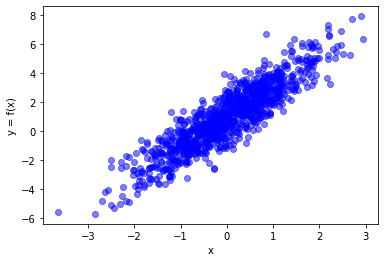

In [7]:
n = int(1e3)
x = np.random.normal(loc = 0, scale = 1, size = n)
y = 1 + 2*x + np.random.normal(loc = 0, scale = 1, size = n)
plt.plot(x,y, 'bo', alpha = 0.5)
plt.xlabel("x")
plt.ylabel("y = f(x)")
plt.show()

## Question 2.2 

Code a function `loss(b)` that implements

$$
\begin{aligned}
L(\beta) &= \sum_{i=1}^n (\hat{y} - y)^2 \\
         &= \sum_{i=1}^n (\beta_0 + \hat{\beta}_1 x - y)^2
\end{aligned}
$$

Your function should look like this:

```python
def loss(b):
    # predicted value given parameters `b`
    yhat = 
    # the error
    error = 
    # the sum of squared errors
    sse = 
    return(sse)
```

The argument `b` should be a list or numpy array. 

**Hint**: Remember you can subset an array `arr` with `[]` (e.g., `arr[0]` for the first element.

In [8]:
def loss(b):
    yhat = b[0] + b[1]*x
    error = yhat - y 
    sse = np.sum(error**2)
    return(sse)

## Question 2.2

Check the loss when $\beta_0 = 1$ and $\beta_1 = 2$:

In [9]:
loss(b = [1,2])

930.3435290600534

## Question 2.3

Use `optimize.minimize` to optimize your loss function. 

**Hint**: You can pass a list or numpy array to `x0`.

In [10]:
optimize.minimize(fun = loss, x0 = [0,0])

      fun: 930.1561048415696
 hess_inv: array([[ 4.99510680e-04, -4.31499046e-05],
       [-4.31499046e-05,  4.13062552e-04]])
      jac: array([-7.62939453e-06,  7.62939453e-06])
  message: 'Optimization terminated successfully.'
     nfev: 33
      nit: 7
     njev: 11
   status: 0
  success: True
        x: array([0.99276304, 2.01158173])

# Question 3

Solve the same problem above (as in, use the same `x` and `y` and loss function) using gradient descent. 

Set: 

* `n_iter` to 1000
* `alpha` or `step_size` (pick one) to 0.01
* the starting value of `b0_hat` to -10
* the starting value of `b1_hat` to 10

Print your results -- **just the final values of the estimated parameters** -- at the end of your cell.

In [11]:
n_iter = 1000
b0_hat = -10
b1_hat = 10
alpha = 0.01
N = len(y)
for i in range(n_iter):
    gradient_b0 = (1/N) * np.sum((b0_hat + b1_hat*x) - y)
    gradient_b1 = (1/N) * np.sum(x * ((b0_hat + b1_hat*x) - y))
    b0_hat -= alpha * gradient_b0
    b1_hat -= alpha * gradient_b1
print(b0_hat)
print(b1_hat)

0.992307005929387
2.0119009519965685
